# openpvtools

In [1]:
import utils
from bokeh.plotting import figure, show
from bokeh.models import HoverTool
from bokeh.io import output_notebook

In [2]:
output_notebook()

Loading BokehJS ...

## ReadTheDocs

In [3]:
df = utils.get_rtd_analytics_data('openpvtools')
data_period = df['Date'].min().strftime('%Y-%m-%d') + ' to ' + df['Date'].max().strftime('%Y-%m-%d')

In [4]:
daily_views = df.pivot_table(values='Views', index='Date', columns='Version', aggfunc='sum')[['latest']].fillna(0)

p = figure(x_axis_type="datetime", height=350, title=f"Daily views by RTD version")
hover_tool = HoverTool(tooltips=[('Date', '@x{%Y-%m-%d}'), ('Views', '@y')],
                       formatters={'@x': 'datetime'})
hover_tool.point_policy = 'snap_to_data'
p.add_tools(hover_tool)
p.line(daily_views.index, daily_views['latest'], legend_label='latest')
p.yaxis.axis_label = 'Daily page views'
show(p)

In [5]:
df2 = df.loc[(df['Version'] == 'latest'), :].copy()
pathviews = df2.groupby('Path')['Views'].sum().reset_index()

In [6]:
n = 20
subset = pathviews.sort_values('Views', ascending=False)[:n]
p = figure(y_range=subset['Path'], height=400, tooltips=[("URL", "@Path"), ("Views", "@Views")],
           title=f"Views by URL (Top {n}, {data_period})")
p.hbar(y='Path', right='Views', source=subset, height=0.75,
       line_color='white')
p.xaxis.axis_label = 'Total page views'
show(p)

## GitHub

In [7]:
gh = utils.get_github_stars('openpvtools/openpvtools')

In [8]:
p = utils.plot_github_stars_timeseries(gh)
show(p)

In [9]:
contributor_ts, _ = utils.get_github_contributor_timeseries("openpvtools/openpvtools")
p = utils.plot_github_contributors_timeseries(contributor_ts)
show(p)

In [10]:
contributors = utils.get_github_contributors('openpvtools/openpvtools')

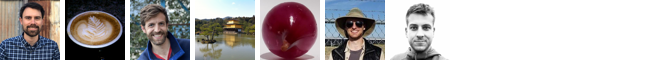

In [11]:
mosaic = utils.make_github_contributors_mosaic(contributors)
mosaic